# Machine Learning - Assignment 2 - More Comparative Experimentation

Dataset: <b>Image</b>

Thomas Bründl

se21m032

<br>

### Approach

In this exercise I experimented with three different algorithms (KNN, Perceptron, Decission Tree).
The input parameters of the respective algorithms were varied to determine how this would affect Effectiveness and Efficiency.


### Evaluation methods

For each dataset, I investigated 2 parameters to determine Efficiency:

1. Training time
2. Testing time

To determine Effectiveness I took a look at 4 different parameters:

1. Accuracy score
2. Jaccard score
3. f1 score
4. Precision score

In [1]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.linear_model import Perceptron


from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm


In [2]:
random_state = 1524401

myPath:  C:/Users/tbrue/pg/mle/secondAssignment
imagePath:  C:/Users/tbrue/pg/mle/secondAssignment/tmp/FIDS30/
Found 971 files

Found the following classes: ['acerolas', 'apples', 'apricots', 'avocados', 'bananas', 'blackberries', 'blueberries', 'cantaloupes', 'cherries', 'coconuts', 'figs', 'grapefruits', 'grapes', 'guava', 'kiwifruit', 'lemons', 'limes', 'mangos', 'olives', 'oranges', 'passionfruit', 'peaches', 'pears', 'pineapples', 'plums', 'pomegranates', 'raspberries', 'strawberries', 'tomatoes', 'watermelons']
Transformed labels (first elements: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4

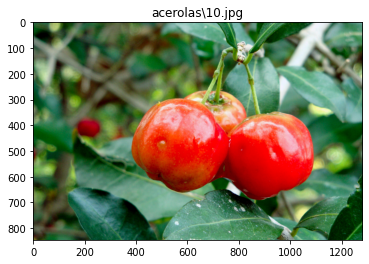

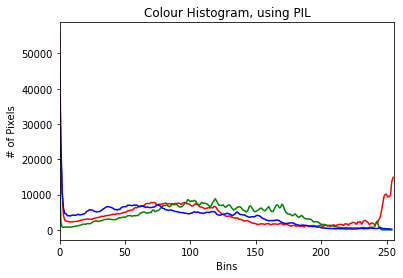

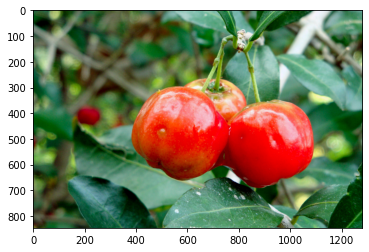

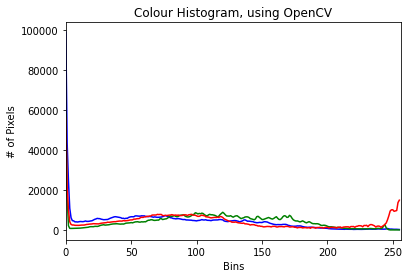

In [3]:
# We need to construct our data set; unfortunately, we don't simply have a "loadFruitImageDataSet()" function in SK-learn...
# So we need to 
## Download our data set & extract it (one-time effort)
## Run an image feature extraction
## Create the create the ground truth (label assignment, target, ...) 


# path to our image folder
# For the first run, download the images from http://data.vicos.si/datasets/FIDS30/FIDS30.zip, and unzip them to your folder


import pathlib
myPath = pathlib.Path().resolve()
myPath = str(myPath).replace("\\", "/")
print("myPath: ", myPath)

imagePath=  myPath + "/tmp/FIDS30/"
print("imagePath: ", imagePath)

# Find all images in that folder; there are like 1.000 different ways to do this in Python, we chose this one :-)
import glob, os
os.chdir(imagePath)
fileNames = glob.glob("*/*.jpg")
numberOfFiles=len(fileNames)
targetLabels=[]

print ("Found " + str(numberOfFiles) + " files\n")

# The first step - create the ground truth (label assignment, target, ...) 
# For that, iterate over the files, and obtain the class label for each file
# Basically, the class name is in the full path name, so we simply use that
for fileName in fileNames:
    pathSepIndex = fileName.index("\\")
    targetLabels.append(fileName[:pathSepIndex])

# sk-learn can only handle labels in numeric format - we have them as strings though...
# Thus we use the LabelEncoder, which does a mapping to Integer numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(targetLabels) # this basically finds all unique class names, and assigns them to the numbers
print ("Found the following classes: " + str(list(le.classes_)))

# now we transform our labels to integers
target = le.transform(targetLabels); 
# print ("Transformed labels (first elements: " + str(target[0:150]))
print ("Transformed labels (first elements: " + str(target))


# If we want to find again the label for an integer value, we can do something like this:
print (list(le.inverse_transform([0, 18, 1])))

print ("... done label encoding")

# Before we do actual feature extaction just for curiosity, let's look at one image, to illustrate what we are going to do

# import the necessary packages
from matplotlib import pyplot as plt

%matplotlib inline

# import libraries for image feature extraction
import numpy as np
import cv2
# For OpenCV (need Version 2.4+) for Python 2.7, on Ubuntu Linux, just "sudo apt install python-opencv"
# In other OS, that might be different.

from PIL import Image

demoImageName = fileNames[1]
demoImage = imagePath + demoImageName
print ("Showing demo feature extraction on image " + demoImage)

# load the image & plot it
imagePIL = Image.open(demoImage)
imgplot = plt.imshow(imagePIL)
plt.title(demoImageName)

# now we compute a colour histogram using the histogram function in pillow
# This gives us one histogram with 768 values, which is 3 x 256 values for each colour
# For each colour channel, each value repesent the count how many pixels have that colour intensity
featureVector=imagePIL.histogram()

# We plot this histogram
plt.figure()
plt.plot(featureVector[:256], 'r')
plt.plot(featureVector[257:512], 'g')
plt.plot(featureVector[513:], 'b')
plt.xlim([0, 256])
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.title("Colour Histogram, using PIL")

# An alternative is to use open CV
imageOpenCV = cv2.imread(demoImage)

# OpenCV is a bit weird, because it changes the channel order, it stores them as BGR, instead of RGB
# So if we want to display the image, we have to invert it
plt.figure()
plt.imshow(cv2.cvtColor(imageOpenCV, cv2.COLOR_BGR2RGB))

chans = cv2.split(imageOpenCV) # split the image in the different channels (RGB, but in open CV, it is BGR, actually..)
colors = ("b", "g", "r")
plt.figure()
plt.title("Colour Histogram, using OpenCV")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
featuresOpenCV = []

# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and add it to the resulting histograms array (of arrays)
    # We can specifiy here in the 4th argument how many bins we want - 256 means the same as in the previous histogram
    histOpenCV = cv2.calcHist([chan], [0], None, [256], [0, 256])
    featuresOpenCV.extend(histOpenCV)

    # plot the histogram of the current colour
    plt.plot(histOpenCV, color = color)
    plt.xlim([0, 256])
    
# Now we have a 2D-array - 256 values for each of 3 colour channels.
# To input this into our machine learning, we need to "flatten" the features into one larger 1D array
# the size of this will be 3 x 256 = 768 values
featureVectorOpenCV = np.array(featuresOpenCV).flatten()


# show all the plots
plt.show()



In [4]:
# so NOW we actually extract features from our images
import datetime

def dump(obj):
      for attr in dir(obj):
          print("obj.%s = %r" % (attr, getattr(obj, attr)))



class ObjectClass():
        def newAttr(self, attr):
                setattr(self, attr, attr)

objectClass = ObjectClass()

print ("Extracting features using PIL/PILLOW" + " (" + str(datetime.datetime.now()) + ")")

# The simplest approach is via the PIL/PILLOW package; here we get a histogram over each RGB channel
# Note: this doesn't really represent colours, as a colour is made up of the combination of the three channels!
data=[]
for index, fileName in enumerate(fileNames):
    imagePIL = Image.open(imagePath + fileName)
    # Not all images in our dataset are in RGB color scheme (e.g. indexed colours)
    # We need to make sure that they are RGB , otherwise we can't expect to have exactly three RGB channels..
    imagePIL = imagePIL.convert('RGB')     
    featureVector=imagePIL.histogram()
    
    if (len(featureVector) != 768): # just a sanity check; with the transformation to RGB, this should never happen
        print ("Unexpected length of feature vector: " + str(len(featureVector)) + " in file: " + fileName)

    data.append((featureVector))
    # setattr(objectClass, str(index), featureVector)



# Next, we extract a few more features using OpenCV

print ("Extracting features using OpenCV" + " (" + str(datetime.datetime.now()) + ")")
dataOpenCV_1D=[]
dataOpenCV_2D=[]
dataOpenCV_3D=[]

# use our own simple function to flatten the 2D arrays
flatten = lambda l: [item for sublist in l for item in sublist]

for fileName in fileNames:

    # the easiest way would to do the following:
    # imageOpenCV = cv2.imread(imagePath + fileName)

    # However, we have the same issue as before, and it is more difficult in OpenCV to convert to an RGB image
    # Thus we do this using PIL, and then convert to OpenCV ....
    imagePIL = Image.open(imagePath + fileName)
    imagePIL = imagePIL.convert('RGB')
    imageOpenCV = np.array(imagePIL) 
    # Convert RGB to BGR 
    imageOpenCV = imageOpenCV[:, :, ::-1].copy() 

    # Now we split the image in the three channels, B / G / R
    chans = cv2.split(imageOpenCV)
    colors = ("b", "g", "r")

    # First we do also features per channel, but this time, we aggregate them into a smaller number of bins
    # I.e. we do not have 256 values per channel, but less
    featuresOpenCV_1D = []
    bins_1D=64
    for (chan, color) in zip(chans, colors): # we compute the histogram over each channel
        histOpenCV = cv2.calcHist([chan], [0], None, [bins_1D], [0, 256])
        featuresOpenCV_1D.extend(histOpenCV)
    featureVectorOpenCV_1D = flatten(featuresOpenCV_1D) # and append this to our feature vector
    
    dataOpenCV_1D.append(featureVectorOpenCV_1D) # now we append the feature vector to the dataset so far

    if (len(featureVectorOpenCV_1D) != bins_1D*3): # sanity check, in case we had a wrong number of channels...
        print ("Unexpected length of feature vector: " + str(len(featureVectorOpenCV_1D)) + " in file: " + fileName)

    # Next - features that look at two channels at the same time
    # E.g. we look at when green and blue have both "high values"
    # We reduce the size of bins further, to not have a too long feature vector
    featuresOpenCV_2D = []
    bins2D=16
    # look at all combinations of channels (R & B, R & G, B & G)
    featuresOpenCV_2D.extend(cv2.calcHist([chans[1], chans[0]], [0, 1], None, [bins2D, bins2D], [0, 256, 0, 256]))
    featuresOpenCV_2D.extend(cv2.calcHist([chans[1], chans[2]], [0, 1], None, [bins2D, bins2D], [0, 256, 0, 256]))
    featuresOpenCV_2D.extend(cv2.calcHist([chans[0], chans[2]], [0, 1], None, [bins2D, bins2D], [0, 256, 0, 256]))
    # and add that to our dataset
    featureVectorOpenCV_2D = flatten(featuresOpenCV_2D)
    dataOpenCV_2D.append(featureVectorOpenCV_2D)

    # finally, we look at all three channels at the same time.
    # We further reduce our bin size, because otherwise, this would become very large...
    featuresOpenCV_3D = cv2.calcHist([imageOpenCV], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    # append to our dataset
    featureVectorOpenCV_3D = featuresOpenCV_3D.flatten()
    dataOpenCV_3D.append(featureVectorOpenCV_3D)

        
print (".... done" + " (" + str(datetime.datetime.now()) + ")")

Extracting features using PIL/PILLOW (2022-05-22 20:48:56.258627)
Extracting features using OpenCV (2022-05-22 20:49:12.084194)
.... done (2022-05-22 20:49:50.215126)


In [5]:
# And now we finally classify 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# these are our feature sets; we will use each of them individually to train classifiers
# trainingSets = [data, dataOpenCV_1D, dataOpenCV_2D, dataOpenCV_3D]


trainingSets = [('data', data, target),('dataOpenCV_1D', dataOpenCV_1D, target) , ("dataOpenCV_2D", dataOpenCV_2D, target), ("dataOpenCV_3D", dataOpenCV_3D, target)]



# set up a number of classifiers
classifiers = [neighbors.KNeighborsClassifier(),
               naive_bayes.GaussianNB(), 
               tree.DecisionTreeClassifier(),
               ensemble.RandomForestClassifier(),
               svm.SVC(),
               svm.LinearSVC(),
              ]


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Now iterate over the datasets & classifiers, and train...

# for index, train in enumerate(trainingSets):
#     for classifier in classifiers:
        # do the classification here ....


# Classifiers

In [6]:
def kNN (dataSetName, X_train, X_test, y_train, y_test, n_neighbors_values):
    
    results = []

    for n_neighbors in n_neighbors_values:
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm='kd_tree')

            # Train classifier
            start_time = datetime.datetime.now()
            
            #classifier.fit(X_train, y_train.values.ravel())
            classifier.fit(X_train, y_train.ravel())

            end_time = datetime.datetime.now()
            training_time_sec = (end_time - start_time).total_seconds()

            # Predict test set on trained classifier
            start_time = datetime.datetime.now()
            y_test_predicted = classifier.predict(X_test)
            end_time = datetime.datetime.now()
            testing_time_sec = (end_time - start_time).total_seconds()

            # Compute metrics
            acc = metrics.accuracy_score(y_test, y_test_predicted)
            f1 = f1_score(y_true=y_test, y_pred=y_test_predicted, average='weighted')

            # Store results
            result = type('',(object,),{'n_neigbors': n_neighbors, 'training_time_sec': training_time_sec, 'testing_time_sec': testing_time_sec, 'acc': acc, 'f1': f1})()
            results.append(result)

    # Print results
    print(dataSetName)
    print('Algorithm | acc | f1 | training_time_sec | testing_time_sec')
    for res in results:
        print('k-NN (' + str(res.n_neigbors) + '-NN) | ' + str(round(res.acc, 3)) + ' | ' + str(round(res.f1, 3)) + ' | ' + str(res.training_time_sec) + ' sec | ' + str(res.testing_time_sec) + ' sec')
    print()

In [7]:
# perceptron
def perceptron(dataSetName, X_train, X_test, y_train, y_test, alpha_values):

        results = []

        for alpha in alpha_values:
                classifier = Perceptron(alpha=alpha, random_state=random_state)

                # Train classifier
                start_time = datetime.datetime.now()
                classifier.fit(X_train, y_train.ravel())
                end_time = datetime.datetime.now()
                training_time_sec = (end_time - start_time).total_seconds()

                # Predict test set on trained classifier
                start_time = datetime.datetime.now()
                y_test_predicted = classifier.predict(X_test)
                end_time = datetime.datetime.now()
                testing_time_sec = (end_time - start_time).total_seconds()

                # Compute metrics
                acc = metrics.accuracy_score(y_test, y_test_predicted)
                f1 = f1_score(y_true=y_test, y_pred=y_test_predicted, average='weighted')

                # Store results
                result = type('',(object,),{'alpha': alpha, 'training_time_sec': training_time_sec, 'testing_time_sec': testing_time_sec, 'acc': acc, 'f1': f1})()
                results.append(result)

        # Print results
        print(dataSetName)
        print('Algorithm | acc | f1 | training_time_sec | testing_time_sec')
        for res in results:
                print('Perceptron (alpha: ' + str(res.alpha) + ') | ' + str(round(res.acc, 3)) + ' | ' + str(round(res.f1, 3)) + ' | ' + str(res.training_time_sec) + ' sec | ' + str(res.testing_time_sec) + ' sec')
        print()

In [8]:
# decision tree
def decision_tree(dataSetName, X_train, X_test, y_train, y_test, max_features_values):

    results = []

    for max_features in max_features_values:
            classifier = DecisionTreeClassifier(max_features=max_features, random_state=random_state) 

            # Train classifier
            start_time = datetime.datetime.now()
            classifier.fit(X_train, y_train.ravel())
            end_time = datetime.datetime.now()
            training_time_sec = (end_time - start_time).total_seconds()

            # Predict test set on trained classifier
            start_time = datetime.datetime.now()
            y_test_predicted = classifier.predict(X_test)
            end_time = datetime.datetime.now()
            testing_time_sec = (end_time - start_time).total_seconds()

            # Compute metrics
            acc = metrics.accuracy_score(y_test, y_test_predicted)
            f1 = f1_score(y_true=y_test, y_pred=y_test_predicted, average='weighted')

            # Store results
            result = type('',(object,),{'max_features': max_features, 'training_time_sec': training_time_sec, 'testing_time_sec': testing_time_sec, 'acc': acc, 'f1': f1})()
            results.append(result)

    # Print results
    print(dataSetName)
    print('Algorithm | acc | f1 | training_time_sec | testing_time_sec')
    for res in results:
        print('Decision tree (max features: ' + str(res.max_features) + ') | ' + str(round(res.acc, 3)) + ' | ' + str(round(res.f1, 3)) + ' | ' + str(res.training_time_sec) + ' sec | ' + str(res.testing_time_sec) + ' sec')
    print()

In [9]:
# naive_bayes

def naive_bayes_fun(dataSetName, X_train, X_test, y_train, y_test):

    results = []


    classifier = GaussianNB() 

    # Train classifier
    start_time = datetime.datetime.now()
    classifier.fit(X_train, y_train.ravel())
    end_time = datetime.datetime.now()
    training_time_sec = (end_time - start_time).total_seconds()

    # Predict test set on trained classifier
    start_time = datetime.datetime.now()
    y_test_predicted = classifier.predict(X_test)
    end_time = datetime.datetime.now()
    testing_time_sec = (end_time - start_time).total_seconds()

    # Compute metrics
    acc = metrics.accuracy_score(y_test, y_test_predicted)
    f1 = f1_score(y_true=y_test, y_pred=y_test_predicted, average='weighted')

    # Store results
    result = type('',(object,),{ 'training_time_sec': training_time_sec, 'testing_time_sec': testing_time_sec, 'acc': acc, 'f1': f1})()
    results.append(result)



    # Print results
    print(dataSetName)
    print('Algorithm | acc | f1 | training_time_sec | testing_time_sec')
    for res in results:
        print('GaussianNB (max features: ' + str(res.max_features) + ') | ' + str(round(res.acc, 3)) + ' | ' + str(round(res.f1, 3)) + ' | ' + str(res.training_time_sec) + ' sec | ' + str(res.testing_time_sec) + ' sec')
    print()




In [10]:
# svm
def svm_svc(dataSetName, X_train, X_test, y_train, y_test):

    results = []
    classifier = make_pipeline(StandardScaler(), SVC(random_state=random_state))

    # Train classifier
    start_time = datetime.datetime.now()
    classifier.fit(X_train, y_train.ravel())
    end_time = datetime.datetime.now()
    training_time_sec = (end_time - start_time).total_seconds()

    # Predict test set on trained classifier
    start_time = datetime.datetime.now()
    y_test_predicted = classifier.predict(X_test)
    end_time = datetime.datetime.now()
    testing_time_sec = (end_time - start_time).total_seconds()

    # Compute metrics
    acc = metrics.accuracy_score(y_test, y_test_predicted)
    f1 = f1_score(y_true=y_test, y_pred=y_test_predicted, average='weighted')

    # Store results
    result = type('',(object,),{'training_time_sec': training_time_sec, 'testing_time_sec': testing_time_sec, 'acc': acc, 'f1': f1})()
    results.append(result)

    # Print results
    print(dataSetName)
    print('Algorithm | acc | f1 | training_time_sec | testing_time_sec')
    for res in results:
        print('SVM | ' + str(round(res.acc, 3)) + ' | ' + str(round(res.f1, 3)) + ' | ' + str(res.training_time_sec) + ' sec | ' + str(res.testing_time_sec) + ' sec')
    print()

# Evaluation

In [11]:
def perceptron_with_parameters(data_set_name, X_train, X_test, y_train, y_test):
    alpha_values = [0.0001, 0.001, 0.01]
    perceptron(data_set_name, X_train, X_test, y_train, y_test, alpha_values)

def kNN_with_parameters(data_set_name, X_train, X_test, y_train, y_test):
    n_neighbors_values = [1, 2, 3]
    kNN(data_set_name, X_train, X_test, y_train, y_test, n_neighbors_values)

def decision_tree_with_parameters(dataSetName, X_train, X_test, y_train, y_test):
    max_features_values = [None, 'sqrt', 'log2'] 
    decision_tree(dataSetName, X_train, X_test, y_train, y_test, max_features_values)

def naive_bayes_with_parameters(dataSetName, X_train, X_test, y_train, y_test):
    naive_bayes_fun(dataSetName, X_train, X_test, y_train, y_test)


classifiers = [
                perceptron_with_parameters,
                kNN_with_parameters,
                decision_tree_with_parameters,
                naive_bayes_with_parameters,
                svm_svc
              ]


# classifiers = [neighbors.KNeighborsClassifier(), # check
#                naive_bayes.GaussianNB(),
#                tree.DecisionTreeClassifier(), # check
#                ensemble.RandomForestClassifier(),
#                svm.SVC(),
#                svm.LinearSVC(),
#               ]



for indexDataset, train_data_set in enumerate(trainingSets):

    data_set_X = train_data_set[1]
    data_set_y = train_data_set[2]

    X, y = shuffle(data_set_X, data_set_y, random_state=random_state)

    # Prepare a train/test set split: split 2/3 1/3 into training & test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

    # if(train_data_set[0] == 'heart_failure_prediction' or train_data_set[0] == 'covertype'):
    #     y_train = y_train.values

    for indexClassifier, classifier in enumerate(classifiers):
        # do the actual classification
        classifier(train_data_set[0], X_train, X_test, y_train, y_test)  

data
Algorithm | acc | f1 | training_time_sec | testing_time_sec
Perceptron (alpha: 0.0001) | 0.109 | 0.084 | 0.319998 sec | 0.015 sec
Perceptron (alpha: 0.001) | 0.109 | 0.084 | 0.257974 sec | 0.013 sec
Perceptron (alpha: 0.01) | 0.109 | 0.084 | 0.250997 sec | 0.016 sec

data
Algorithm | acc | f1 | training_time_sec | testing_time_sec
k-NN (1-NN) | 0.109 | 0.11 | 0.082027 sec | 0.109013 sec
k-NN (2-NN) | 0.084 | 0.078 | 0.077949 sec | 0.119554 sec
k-NN (3-NN) | 0.075 | 0.062 | 0.080959 sec | 0.118043 sec

data
Algorithm | acc | f1 | training_time_sec | testing_time_sec
Decision tree (max features: None) | 0.128 | 0.13 | 0.556909 sec | 0.01 sec
Decision tree (max features: sqrt) | 0.162 | 0.161 | 0.038999 sec | 0.009999 sec
Decision tree (max features: log2) | 0.128 | 0.127 | 0.027001 sec | 0.009 sec

data
Algorithm | acc | f1 | training_time_sec | testing_time_sec
GaussianNB (max features: Not considered) | 0.056 | 0.057 | 0.034999 sec | 0.068 sec

data
Algorithm | acc | f1 | training